In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data=pd.read_csv('jugadores_datos_completos.csv')

In [4]:
#Analisis exploratorio
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               2000 non-null   object 
 1   equipo            1998 non-null   object 
 2   valor_mercado     1838 non-null   object 
 3   ataque            1245 non-null   float64
 4   tecnica           1245 non-null   float64
 5   velocidad         1245 non-null   float64
 6   defensa           1245 non-null   float64
 7   creatividad       1245 non-null   float64
 8   liga              1999 non-null   object 
 9   partidos          1498 non-null   object 
 10  valoracion_media  1498 non-null   float64
dtypes: float64(6), object(5)
memory usage: 172.0+ KB


In [5]:
data.describe()

,ataque,tecnica,velocidad,defensa,creatividad,valoracion_media
count,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1498.000000
mean,51.636948,51.400803,46.667470,48.960643,50.451406,6.905067
std,11.683249,8.498487,10.535056,15.445295,9.918328,0.206377
min,31.000000,11.000000,11.000000,11.000000,31.000000,6.410000
25%,41.000000,46.000000,39.000000,36.000000,43.000000,6.760000
50%,52.000000,51.000000,46.000000,48.000000,49.000000,6.890000
75%,60.000000,56.000000,53.000000,61.000000,56.000000,7.030000
max,92.000000,95.000000,89.000000,93.000000,97.000000,7.940000


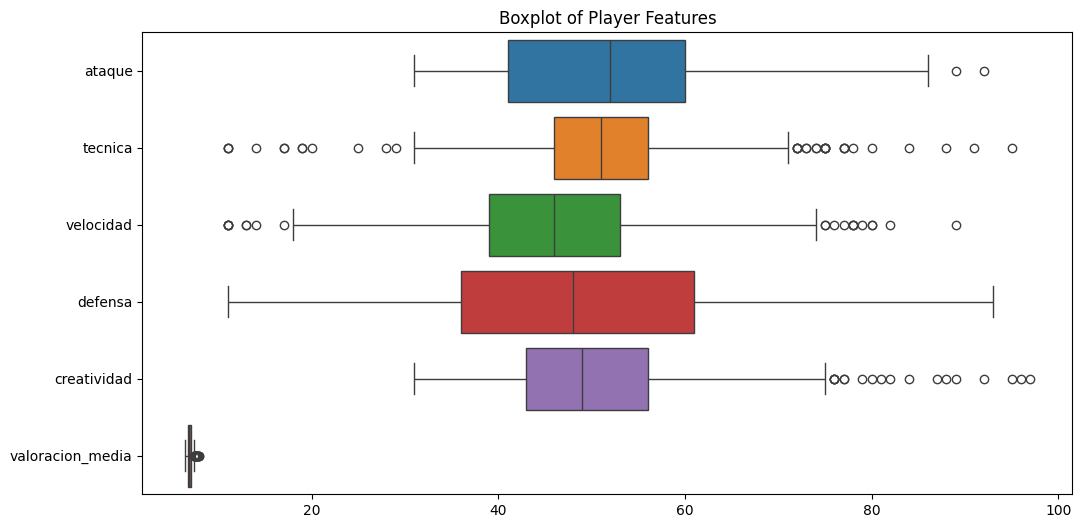

In [6]:
#boxplot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, orient='h')
plt.title('Boxplot of Player Features')
plt.show()

In [7]:
data['valor_mercado']

0       385K €
1        70M €
2       630K €
3       340K €
4       2.1M €
         ...  
1995    1.3M €
1996    1.1M €
1997    2.2M €
1998     97K €
1999    3.1M €
Name: valor_mercado, Length: 2000, dtype: object

In [8]:
#convertimos los K en miles y M en millones
def convert_to_numeric(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.replace('K €', '').replace(',', '')) * 1000
        elif 'M' in value:
            return float(value.replace('M €', '').replace(',', '')) * 1000000
    return value
data['valor_mercado']=data['valor_mercado'].apply(convert_to_numeric)

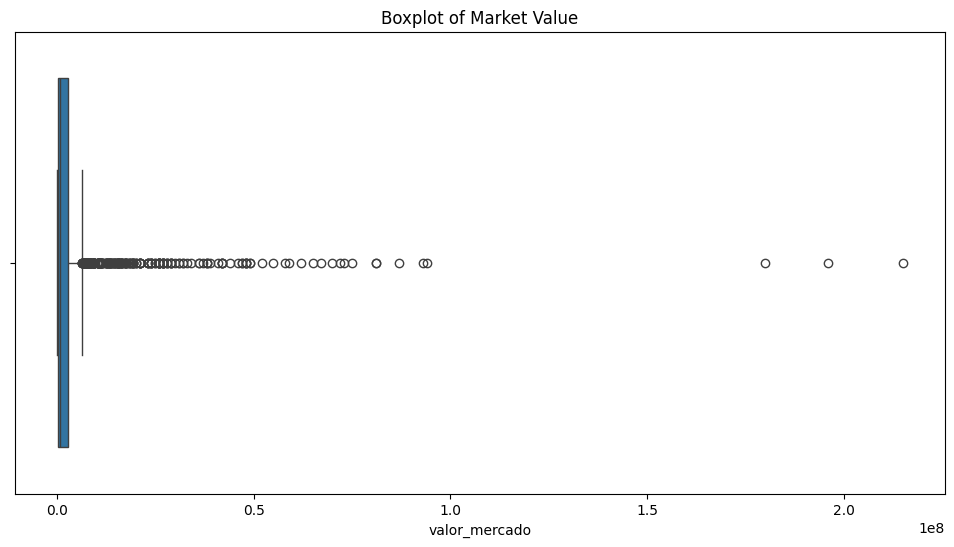

In [9]:
#boxplot de valor mercado
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='valor_mercado')
plt.title('Boxplot of Market Value')
plt.show()

In [10]:
#posiciones
data.dropna(subset=['ataque'], inplace=True)
data.dropna(subset=['valor_mercado'], inplace=True)

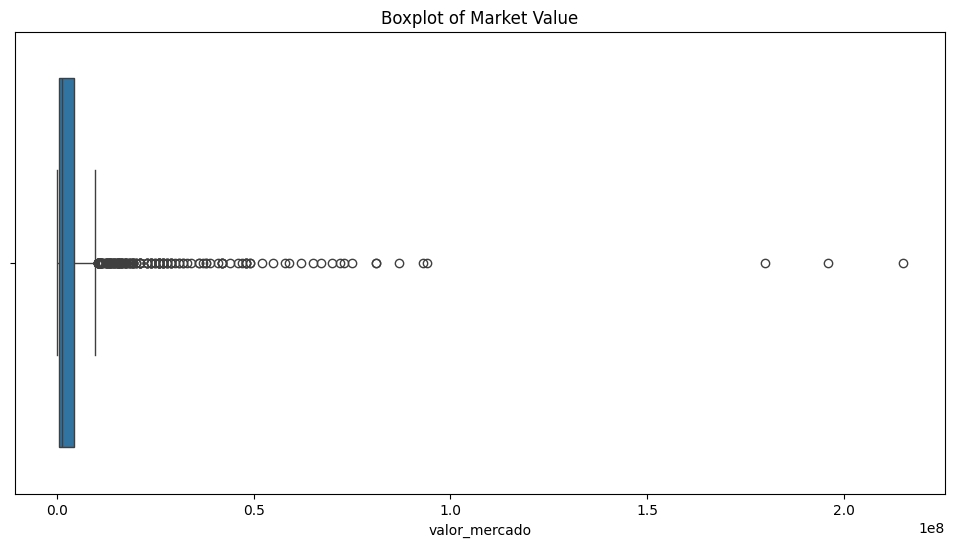

In [11]:
#boxplot de valor mercado
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='valor_mercado')
plt.title('Boxplot of Market Value')
plt.show()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1238 entries, 0 to 1997
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               1238 non-null   object 
 1   equipo            1238 non-null   object 
 2   valor_mercado     1238 non-null   float64
 3   ataque            1238 non-null   float64
 4   tecnica           1238 non-null   float64
 5   velocidad         1238 non-null   float64
 6   defensa           1238 non-null   float64
 7   creatividad       1238 non-null   float64
 8   liga              1238 non-null   object 
 9   partidos          1235 non-null   object 
 10  valoracion_media  1235 non-null   float64
dtypes: float64(7), object(4)
memory usage: 116.1+ KB


In [13]:
#Quitamos la palabra Appearance de las columnas
data.partidos = data.partidos.str.replace(' Appearances', '', regex=False)
#cambiamos el tipo de dato a int
data.partidos = data.partidos.astype(int, errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1238 entries, 0 to 1997
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               1238 non-null   object 
 1   equipo            1238 non-null   object 
 2   valor_mercado     1238 non-null   float64
 3   ataque            1238 non-null   float64
 4   tecnica           1238 non-null   float64
 5   velocidad         1238 non-null   float64
 6   defensa           1238 non-null   float64
 7   creatividad       1238 non-null   float64
 8   liga              1238 non-null   object 
 9   partidos          1235 non-null   object 
 10  valoracion_media  1235 non-null   float64
dtypes: float64(7), object(4)
memory usage: 116.1+ KB


In [14]:
#dropeamos la columna url
data.drop(columns=['url'], inplace=True)

In [15]:
league_uefa_map = {
    'Premier League': 0,
    'LaLiga': 1,
    'Bundesliga': 2,
    'Serie A': 3,
    'Ligue 1': 4,
    'Liga Portugal Betclic': 5,
    'Eredivisie': 6,
    'Trendyol Süper Lig': 7,
    'Pro League': 8,
    'Russian Premier League': 9,
    'Austrian Bundesliga': 10,
    'Swiss Super League': 11,
    'Ukrainian Premier League': 12,
    'Danish Superliga': 13,
    'Ekstraklasa': 14,
    'Allsvenskan': 15,
    'Eliteserien': 16,
    'Scottish Premiership': 17,
    'Stoiximan Super League': 18,
    'Cyprus League by Stoiximan': 19,
    'Romanian Super Liga': 20,
    'HNL': 21,
    'NB I': 22,
    'Niké Liga': 23,
    'PrvaLiga': 24,
    'First League': 25,
    'Scottish Championship': 26,
    'Championship': 27,
    'Eerste Divisie': 28,
    'Danish 1st Division': 29,
    'Betclic 1. Liga': 30,
    'NIFL Premiership': 31,
    'NB II': 32,
    'FNL': 33,
    'Serie B': 34,
    'Challenger Pro League': 35,
    'Challenge League': 36,
    'Slovakia League Two': 37,
    'Mozzart Bet Superliga': 38,
    'Mozzart Bet Prva Liga': 39,
    'Primera Federación': 40,
    'Lowland League': 41,
    '3. Liga': 42,
    'Erste Liga Classic': 43,
    'Chinese Super League': 44,
    'Chance Liga': 45,
    'Israeli Premier League': 46,
}

In [16]:
# Mapea la columna a numérico
data['liga_num'] = data['liga'].map(league_uefa_map)
data[data['liga_num'].isna()]['liga'].unique()


array([], dtype=object)

In [17]:
#convertimos la fila a tipo numérico
data['liga_num'] = pd.to_numeric(data['liga_num'], errors='coerce')
data['partidos'] = pd.to_numeric(data['partidos'], errors='coerce')
data.drop(columns=['liga','equipo'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1238 entries, 0 to 1997
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valor_mercado     1238 non-null   float64
 1   ataque            1238 non-null   float64
 2   tecnica           1238 non-null   float64
 3   velocidad         1238 non-null   float64
 4   defensa           1238 non-null   float64
 5   creatividad       1238 non-null   float64
 6   partidos          1235 non-null   float64
 7   valoracion_media  1235 non-null   float64
 8   liga_num          1238 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 96.7 KB


In [18]:
data.isna().sum()

valor_mercado       0
ataque              0
tecnica             0
velocidad           0
defensa             0
creatividad         0
partidos            3
valoracion_media    3
liga_num            0
dtype: int64

In [19]:
#llenamos los nan por 0
data.fillna(0, inplace=True)

In [20]:
#Hacemos un train test split
X = data.drop(columns=['valor_mercado'])
y = data['valor_mercado']
# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Random Forest RMSE (Train): 3926982.0646931296
SVM RMSE (Train): 13976807.47467005
Random Forest RMSE (Test): 11858604.129454926
SVM RMSE (Test): 18898486.812029816


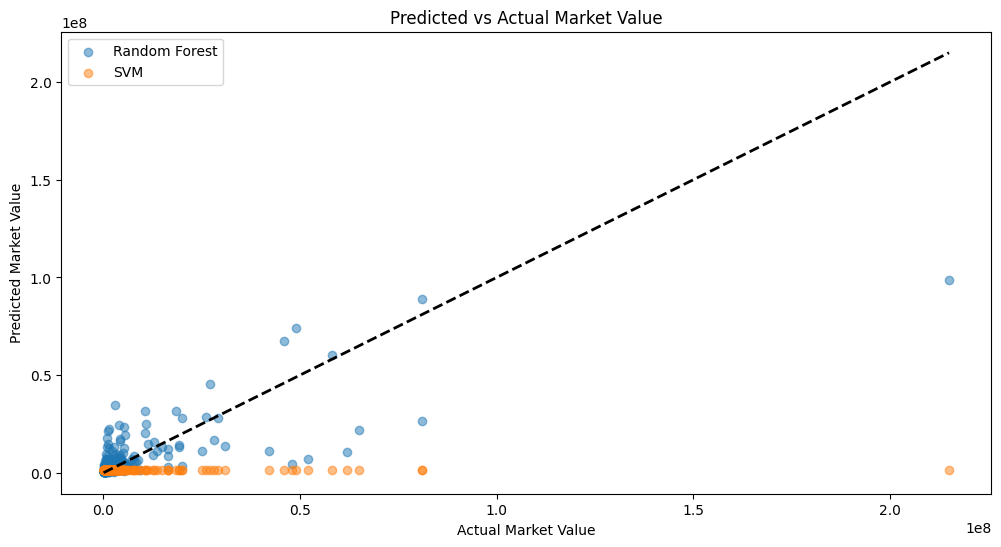

In [21]:
#Random Forest y SVM
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
# Entrenamos un modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
# Entrenamos un modelo de SVM
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
# Evaluamos los modelos por rmse
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
rf_predictions_train = rf_model.predict(X_train_scaled)
rf_rmse_train = np.sqrt(mean_squared_error(y_train, rf_predictions_train))
svm_predictions_train = svm_model.predict(X_train_scaled)
svm_rmse_train = np.sqrt(mean_squared_error(y_train, svm_predictions_train))
print(f'Random Forest RMSE (Train): {rf_rmse_train}')
print(f'SVM RMSE (Train): {svm_rmse_train}')
rf_predictions_test = rf_model.predict(X_test_scaled)
rf_rmse_test = np.sqrt(mean_squared_error(y_test, rf_predictions_test))
svm_predictions_test = svm_model.predict(X_test_scaled)
svm_rmse_test = np.sqrt(mean_squared_error(y_test, svm_predictions_test))
print(f'Random Forest RMSE (Test): {rf_rmse_test}')
print(f'SVM RMSE (Test): {svm_rmse_test}')
# Visualizamos las predicciones
plt.figure(figsize=(12, 6))
plt.scatter(y_test, rf_predictions_test, label='Random Forest', alpha=0.5)
plt.scatter(y_test, svm_predictions_test, label='SVM', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.title('Predicted vs Actual Market Value')
plt.legend()
plt.show()

MLP RMSE (Train): 7083872.075645824
MLP RMSE (Test): 10320985.168443106


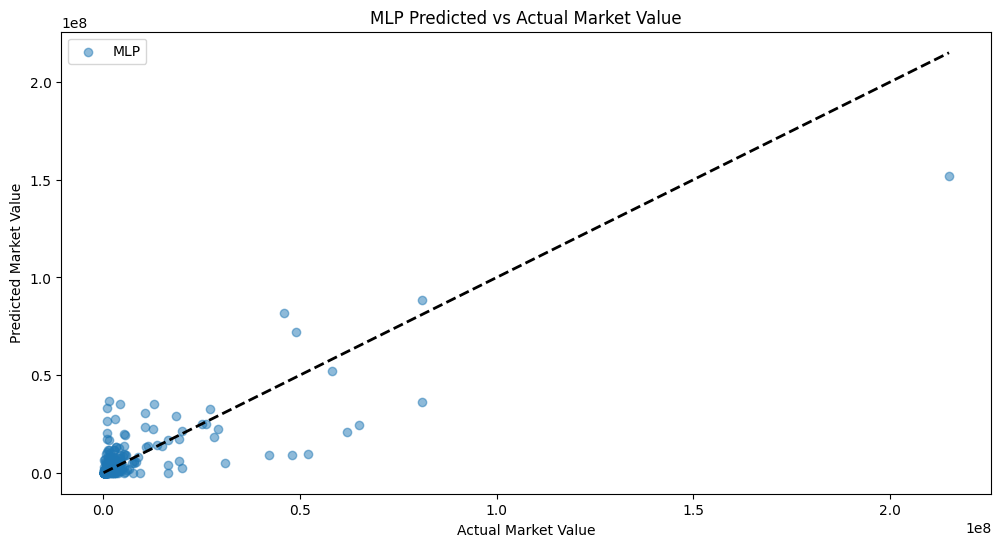

In [22]:
#Usamos mlp
from sklearn.neural_network import MLPRegressor
# Entrenamos un modelo de MLP
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 100,50,50,), max_iter=2000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)
# Evaluamos el modelo de MLP por rmse
mlp_predictions_train = mlp_model.predict(X_train_scaled)
mlp_rmse_train = np.sqrt(mean_squared_error(y_train, mlp_predictions_train))
mlp_predictions_test = mlp_model.predict(X_test_scaled)
mlp_rmse_test = np.sqrt(mean_squared_error(y_test, mlp_predictions_test))
print(f'MLP RMSE (Train): {mlp_rmse_train}')
print(f'MLP RMSE (Test): {mlp_rmse_test}')
# Visualizamos las predicciones del modelo MLP
plt.figure(figsize=(12, 6))
plt.scatter(y_test, mlp_predictions_test, label='MLP', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.title('MLP Predicted vs Actual Market Value')
plt.legend()
plt.show()

Entrenando modelo MLP...
✓ Modelo convergió en 193 iteraciones
MLP RMSE (Train): 11,757,912.13
MLP RMSE (Test): 15,756,957.40
MLP R² (Train): 0.2208
MLP R² (Test): 0.2464
✓ No hay signos evidentes de overfitting
✓ Modelo convergió en 193 iteraciones
MLP RMSE (Train): 11,757,912.13
MLP RMSE (Test): 15,756,957.40
MLP R² (Train): 0.2208
MLP R² (Test): 0.2464
✓ No hay signos evidentes de overfitting


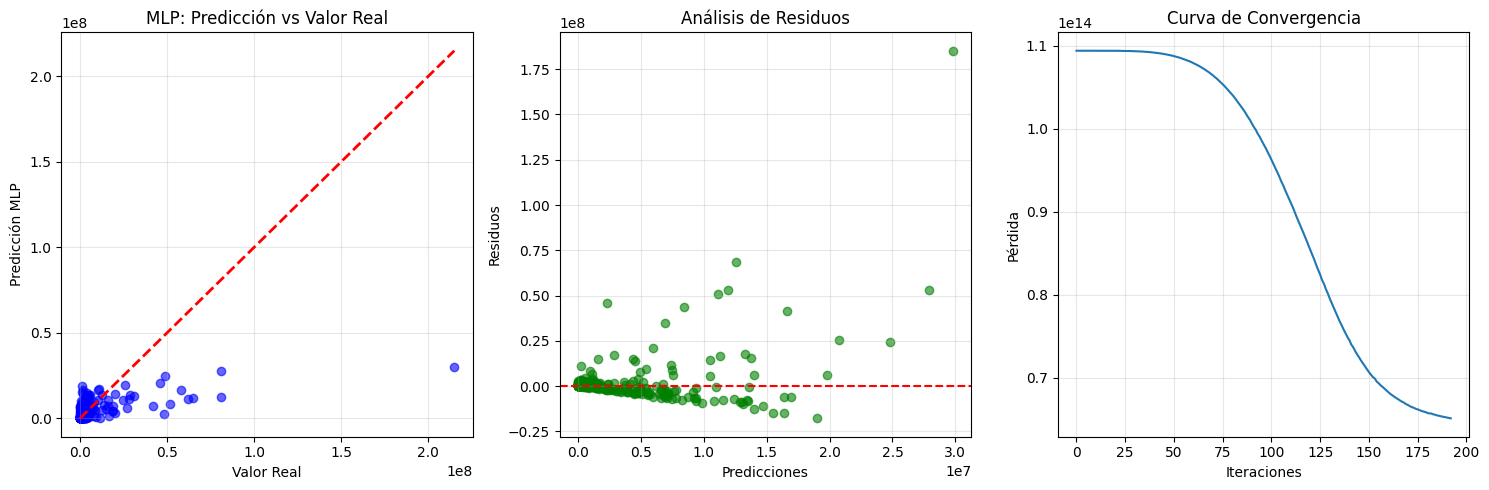

In [187]:
# Usamos MLP con mejoras
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Entrenamos un modelo de MLP mejorado
mlp_model = MLPRegressor(
    hidden_layer_sizes=(200, 100, 50),  # Arquitectura optimizada
    activation='relu',                   # Función de activación
    solver='adam',                       # Optimizador
    alpha=0.001,                        # Regularización L2
    learning_rate='adaptive',           # Tasa de aprendizaje adaptativa
    max_iter=3000,                      # Más iteraciones
    early_stopping=True,                # Parada temprana
    validation_fraction=0.1,            # Fracción para validación
    n_iter_no_change=50,               # Paciencia para parada temprana
    random_state=42
)

# Entrenar el modelo
print("Entrenando modelo MLP...")
mlp_model.fit(X_train_scaled, y_train)

# Verificar si el modelo convergió
if mlp_model.n_iter_ == mlp_model.max_iter:
    print("⚠️ Advertencia: El modelo no convergió completamente")
else:
    print(f"✓ Modelo convergió en {mlp_model.n_iter_} iteraciones")

# Evaluamos el modelo de MLP por RMSE
mlp_predictions_train = mlp_model.predict(X_train_scaled)
mlp_rmse_train = np.sqrt(mean_squared_error(y_train, mlp_predictions_train))

mlp_predictions_test = mlp_model.predict(X_test_scaled)
mlp_rmse_test = np.sqrt(mean_squared_error(y_test, mlp_predictions_test))

# Calcular R² score también
from sklearn.metrics import r2_score
mlp_r2_train = r2_score(y_train, mlp_predictions_train)
mlp_r2_test = r2_score(y_test, mlp_predictions_test)

print(f'MLP RMSE (Train): {mlp_rmse_train:,.2f}')
print(f'MLP RMSE (Test): {mlp_rmse_test:,.2f}')
print(f'MLP R² (Train): {mlp_r2_train:.4f}')
print(f'MLP R² (Test): {mlp_r2_test:.4f}')

# Verificar overfitting
if mlp_rmse_train * 1.5 < mlp_rmse_test:
    print("⚠️ Posible overfitting detectado")
else:
    print("✓ No hay signos evidentes de overfitting")

# Visualización mejorada
plt.figure(figsize=(15, 5))

# Subplot 1: Predicciones vs Valores reales
plt.subplot(1, 3, 1)
plt.scatter(y_test, mlp_predictions_test, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicción MLP')
plt.title('MLP: Predicción vs Valor Real')
plt.grid(True, alpha=0.3)

# Subplot 2: Residuos
plt.subplot(1, 3, 2)
residuals = y_test - mlp_predictions_test
plt.scatter(mlp_predictions_test, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.grid(True, alpha=0.3)

# Subplot 3: Curva de pérdida (si está disponible)
plt.subplot(1, 3, 3)
if hasattr(mlp_model, 'loss_curve_'):
    plt.plot(mlp_model.loss_curve_)
    plt.xlabel('Iteraciones')
    plt.ylabel('Pérdida')
    plt.title('Curva de Convergencia')
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, 'Curva de pérdida\nno disponible', 
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Curva de Convergencia')

plt.tight_layout()
plt.show()

🔄 Entrenando y evaluando modelos...
Entrenando Random Forest...
  ✓ RMSE Test: 11,887,374 | R² Test: 0.571 | CV RMSE: 10,874,889
Entrenando Gradient Boosting...
  ✓ RMSE Test: 11,887,374 | R² Test: 0.571 | CV RMSE: 10,874,889
Entrenando Gradient Boosting...
  ✓ RMSE Test: 12,673,292 | R² Test: 0.512 | CV RMSE: 12,170,022
Entrenando SVM (RBF)...
  ✓ RMSE Test: 12,673,292 | R² Test: 0.512 | CV RMSE: 12,170,022
Entrenando SVM (RBF)...
  ✓ RMSE Test: 18,896,627 | R² Test: -0.084 | CV RMSE: 13,966,745
Entrenando SVM (Linear)...
  ✓ RMSE Test: 18,898,487 | R² Test: -0.084 | CV RMSE: 13,967,689
Entrenando Ridge...
  ✓ RMSE Test: 15,836,849 | R² Test: 0.239 | CV RMSE: 11,791,599
Entrenando Lasso...
  ✓ RMSE Test: 15,836,986 | R² Test: 0.239 | CV RMSE: 11,791,902
Entrenando MLP Optimizado...
  ✓ RMSE Test: 18,896,627 | R² Test: -0.084 | CV RMSE: 13,966,745
Entrenando SVM (Linear)...
  ✓ RMSE Test: 18,898,487 | R² Test: -0.084 | CV RMSE: 13,967,689
Entrenando Ridge...
  ✓ RMSE Test: 15,836,849 |

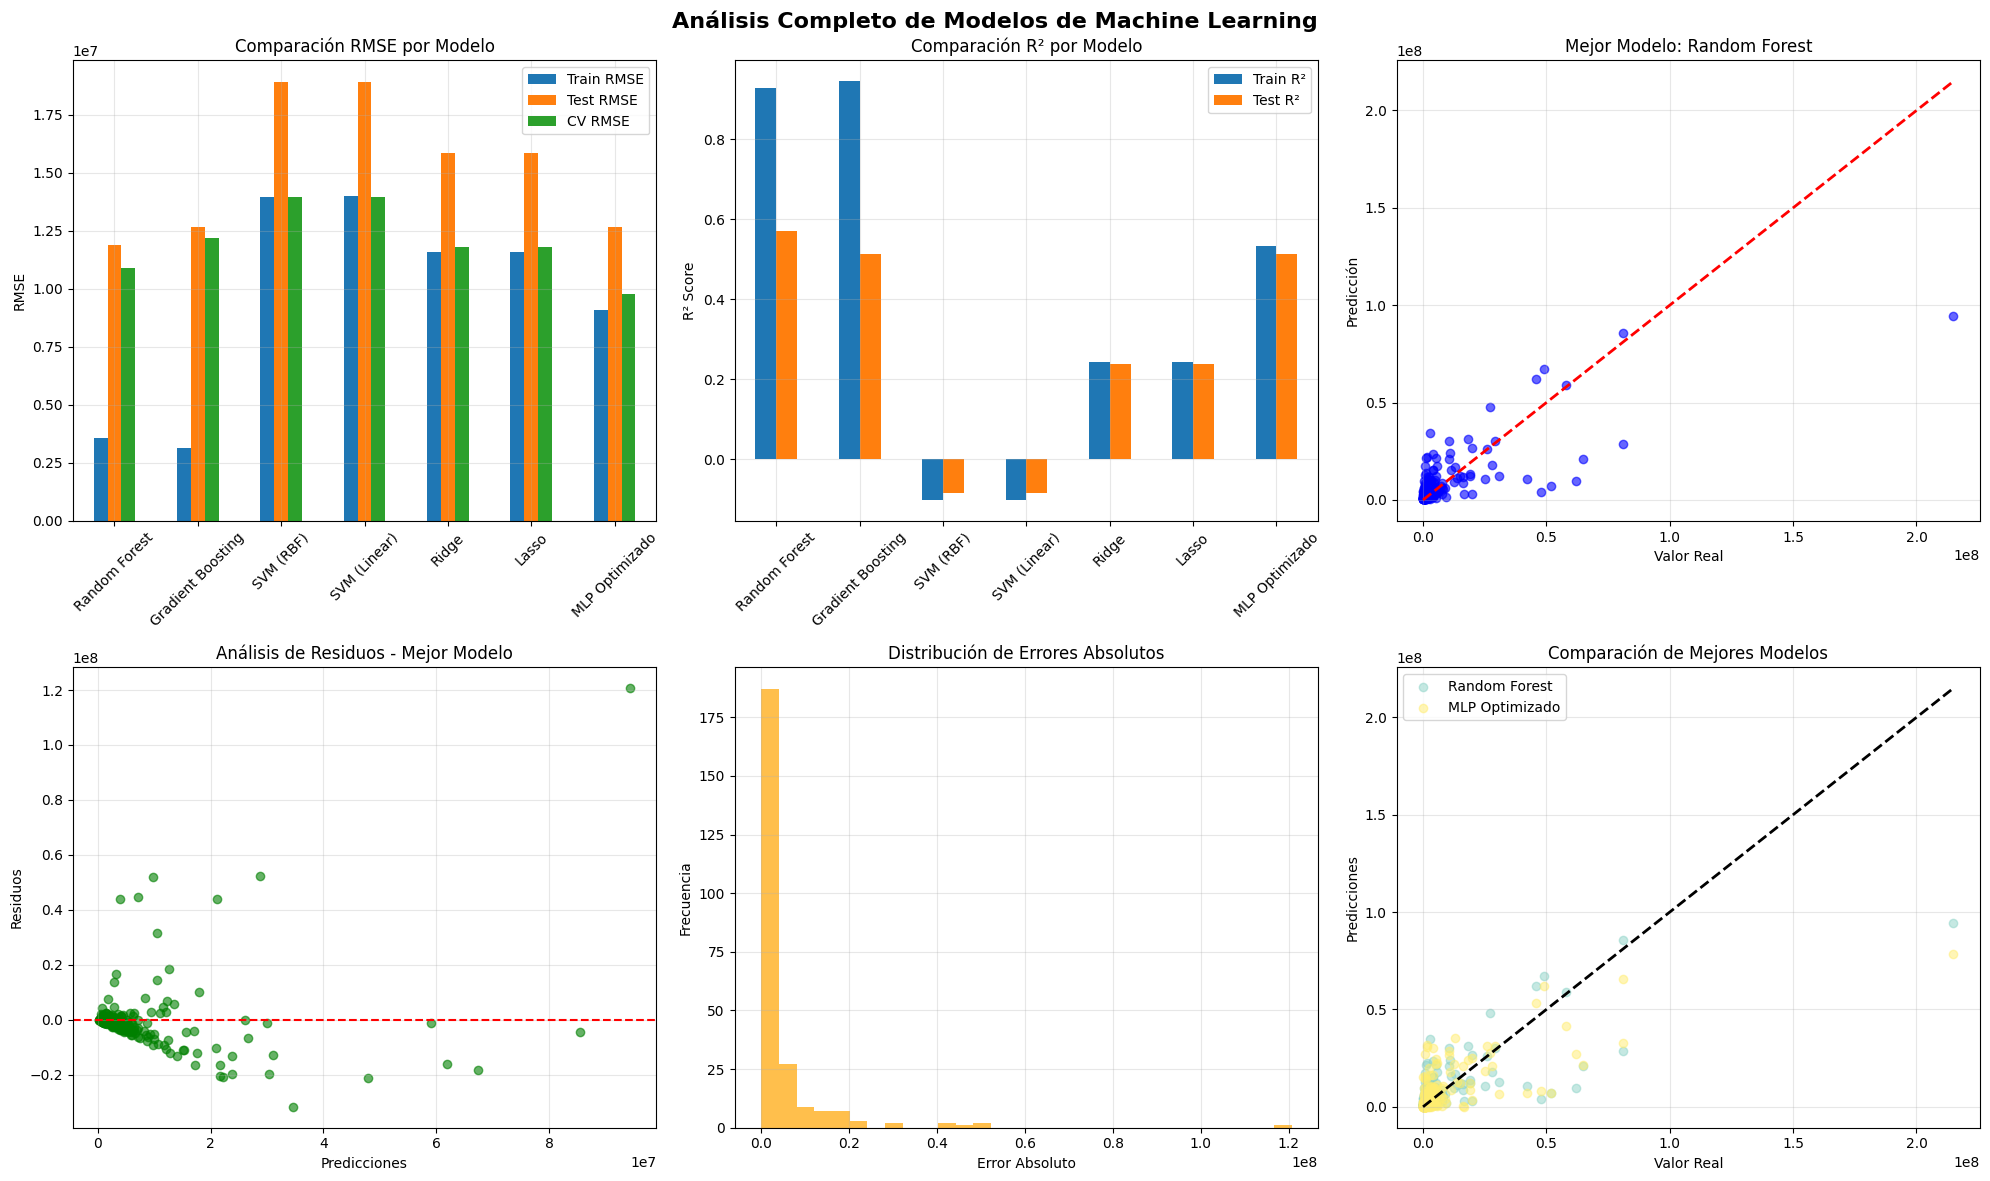

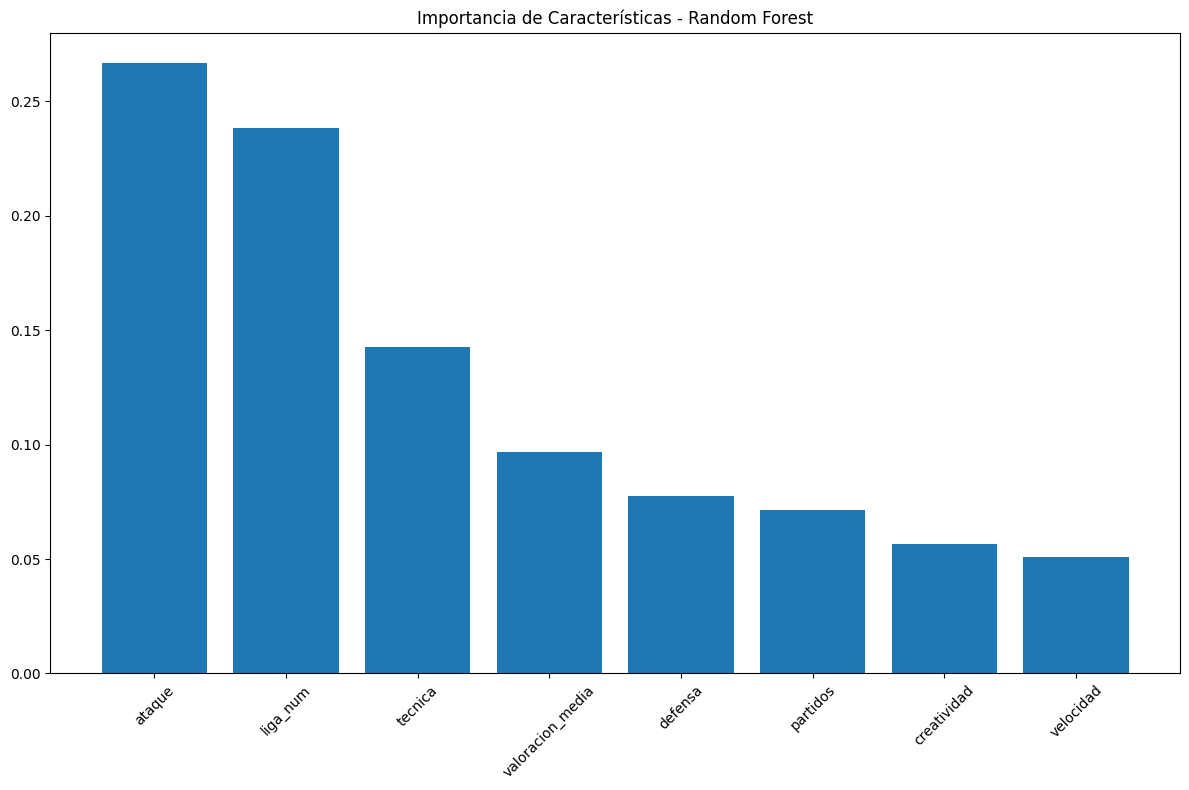


📈 TOP 5 CARACTERÍSTICAS MÁS IMPORTANTES (Random Forest):
  1. ataque: 0.267
  2. liga_num: 0.238
  3. tecnica: 0.143
  4. valoracion_media: 0.097
  5. defensa: 0.077

💡 RECOMENDACIONES:
   • Mejor modelo: Random Forest
   • RMSE de prueba: 11,887,374 €
   • Explica el 57.1% de la varianza
   ⚠️  Modelos con posible overfitting: Random Forest, Gradient Boosting


In [188]:
# Análisis completo de modelos con mejoras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# 1. COMPARACIÓN DE MÚLTIPLES MODELOS
models = {
    'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, random_state=42),
    'SVM (RBF)': SVR(kernel='rbf', C=100, gamma='scale'),
    'SVM (Linear)': SVR(kernel='linear', C=1),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01),
    'MLP Optimizado': MLPRegressor(
        hidden_layer_sizes=(256, 128, 64, 32),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        learning_rate='adaptive',
        max_iter=5000,
        early_stopping=True,
        validation_fraction=0.15,
        n_iter_no_change=100,
        random_state=42
    )
}

# 2. ENTRENAMIENTO Y EVALUACIÓN
results = {}
predictions = {}

print("🔄 Entrenando y evaluando modelos...")
print("="*60)

for name, model in models.items():
    print(f"Entrenando {name}...")
    
    # Entrenar modelo
    model.fit(X_train_scaled, y_train)
    
    # Predicciones
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)
    
    # Métricas
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    cv_rmse = np.sqrt(-cv_scores.mean())
    
    # Guardar resultados
    results[name] = {
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Test MAE': test_mae,
        'CV RMSE': cv_rmse,
        'Overfitting': train_rmse * 1.5 < test_rmse
    }
    
    predictions[name] = test_pred
    
    print(f"  ✓ RMSE Test: {test_rmse:,.0f} | R² Test: {test_r2:.3f} | CV RMSE: {cv_rmse:,.0f}")

print("\n" + "="*60)

# 3. TABLA DE RESULTADOS
df_results = pd.DataFrame(results).T
df_results = df_results.round(2)
print("\n📊 RESUMEN DE RESULTADOS:")
print(df_results[['Test RMSE', 'Test R²', 'Test MAE', 'CV RMSE', 'Overfitting']])

# 4. ENCONTRAR EL MEJOR MODELO
best_model_name = df_results['Test RMSE'].idxmin()
print(f"\n🏆 MEJOR MODELO: {best_model_name}")
print(f"   RMSE: {df_results.loc[best_model_name, 'Test RMSE']:,.0f}")
print(f"   R²: {df_results.loc[best_model_name, 'Test R²']:.3f}")

# 5. VISUALIZACIONES MEJORADAS
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Análisis Completo de Modelos de Machine Learning', fontsize=16, fontweight='bold')

# Subplot 1: Comparación RMSE
ax1 = axes[0, 0]
rmse_data = df_results[['Train RMSE', 'Test RMSE', 'CV RMSE']]
rmse_data.plot(kind='bar', ax=ax1, rot=45)
ax1.set_title('Comparación RMSE por Modelo')
ax1.set_ylabel('RMSE')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Subplot 2: Comparación R²
ax2 = axes[0, 1]
r2_data = df_results[['Train R²', 'Test R²']]
r2_data.plot(kind='bar', ax=ax2, rot=45)
ax2.set_title('Comparación R² por Modelo')
ax2.set_ylabel('R² Score')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Subplot 3: Mejores predicciones vs reales
ax3 = axes[0, 2]
best_pred = predictions[best_model_name]
ax3.scatter(y_test, best_pred, alpha=0.6, color='blue')
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax3.set_xlabel('Valor Real')
ax3.set_ylabel('Predicción')
ax3.set_title(f'Mejor Modelo: {best_model_name}')
ax3.grid(True, alpha=0.3)

# Subplot 4: Residuos del mejor modelo
ax4 = axes[1, 0]
residuals = y_test - best_pred
ax4.scatter(best_pred, residuals, alpha=0.6, color='green')
ax4.axhline(y=0, color='r', linestyle='--')
ax4.set_xlabel('Predicciones')
ax4.set_ylabel('Residuos')
ax4.set_title('Análisis de Residuos - Mejor Modelo')
ax4.grid(True, alpha=0.3)

# Subplot 5: Distribución de errores
ax5 = axes[1, 1]
errors = np.abs(residuals)
ax5.hist(errors, bins=30, alpha=0.7, color='orange')
ax5.set_xlabel('Error Absoluto')
ax5.set_ylabel('Frecuencia')
ax5.set_title('Distribución de Errores Absolutos')
ax5.grid(True, alpha=0.3)

# Subplot 6: Comparación de todos los modelos
ax6 = axes[1, 2]
colors = plt.cm.Set3(np.linspace(0, 1, len(predictions)))
for i, (name, pred) in enumerate(predictions.items()):
    if name in ['Random Forest', 'MLP Optimizado', best_model_name]:  # Solo los mejores
        ax6.scatter(y_test, pred, alpha=0.5, label=name, color=colors[i])

ax6.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax6.set_xlabel('Valor Real')
ax6.set_ylabel('Predicciones')
ax6.set_title('Comparación de Mejores Modelos')
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6. ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS (para modelos que lo soporten)
if hasattr(models[best_model_name], 'feature_importances_'):
    feature_importance = models[best_model_name].feature_importances_
    feature_names = X.columns
    
    plt.figure(figsize=(12, 8))
    indices = np.argsort(feature_importance)[::-1]
    
    plt.title(f'Importancia de Características - {best_model_name}')
    plt.bar(range(len(feature_importance)), feature_importance[indices])
    plt.xticks(range(len(feature_importance)), [feature_names[i] for i in indices], rotation=45)
    plt.tight_layout()
    plt.show()
    
    print(f"\n📈 TOP 5 CARACTERÍSTICAS MÁS IMPORTANTES ({best_model_name}):")
    for i in range(min(5, len(feature_names))):
        print(f"  {i+1}. {feature_names[indices[i]]}: {feature_importance[indices[i]]:.3f}")

# 7. RECOMENDACIONES
print(f"\n💡 RECOMENDACIONES:")
print(f"   • Mejor modelo: {best_model_name}")
print(f"   • RMSE de prueba: {df_results.loc[best_model_name, 'Test RMSE']:,.0f} €")
print(f"   • Explica el {df_results.loc[best_model_name, 'Test R²']*100:.1f}% de la varianza")

overfitting_models = df_results[df_results['Overfitting'] == True].index.tolist()
if overfitting_models:
    print(f"   ⚠️  Modelos con posible overfitting: {', '.join(overfitting_models)}")
else:
    print(f"   ✓ No se detectó overfitting significativo")

🔧 OPTIMIZACIÓN DE RANDOM FOREST
1. Grid Search - Búsqueda exhaustiva...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
✓ Mejores parámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
✓ Mejor score CV: 102,066,909,176,461.75

2. Random Search - Búsqueda aleatoria...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
✓ Mejores parámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
✓ Mejor score CV: 102,066,909,176,461.75

2. Random Search - Búsqueda aleatoria...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
✓ Mejores parámetros: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
✓ Mejor score CV: 102,081,579,380,400.52

3. Comparando modelos optimizados...
✓ Mejores parámetros: {'n_estimators': 500, 'min_samples_split': 2, 'min_s

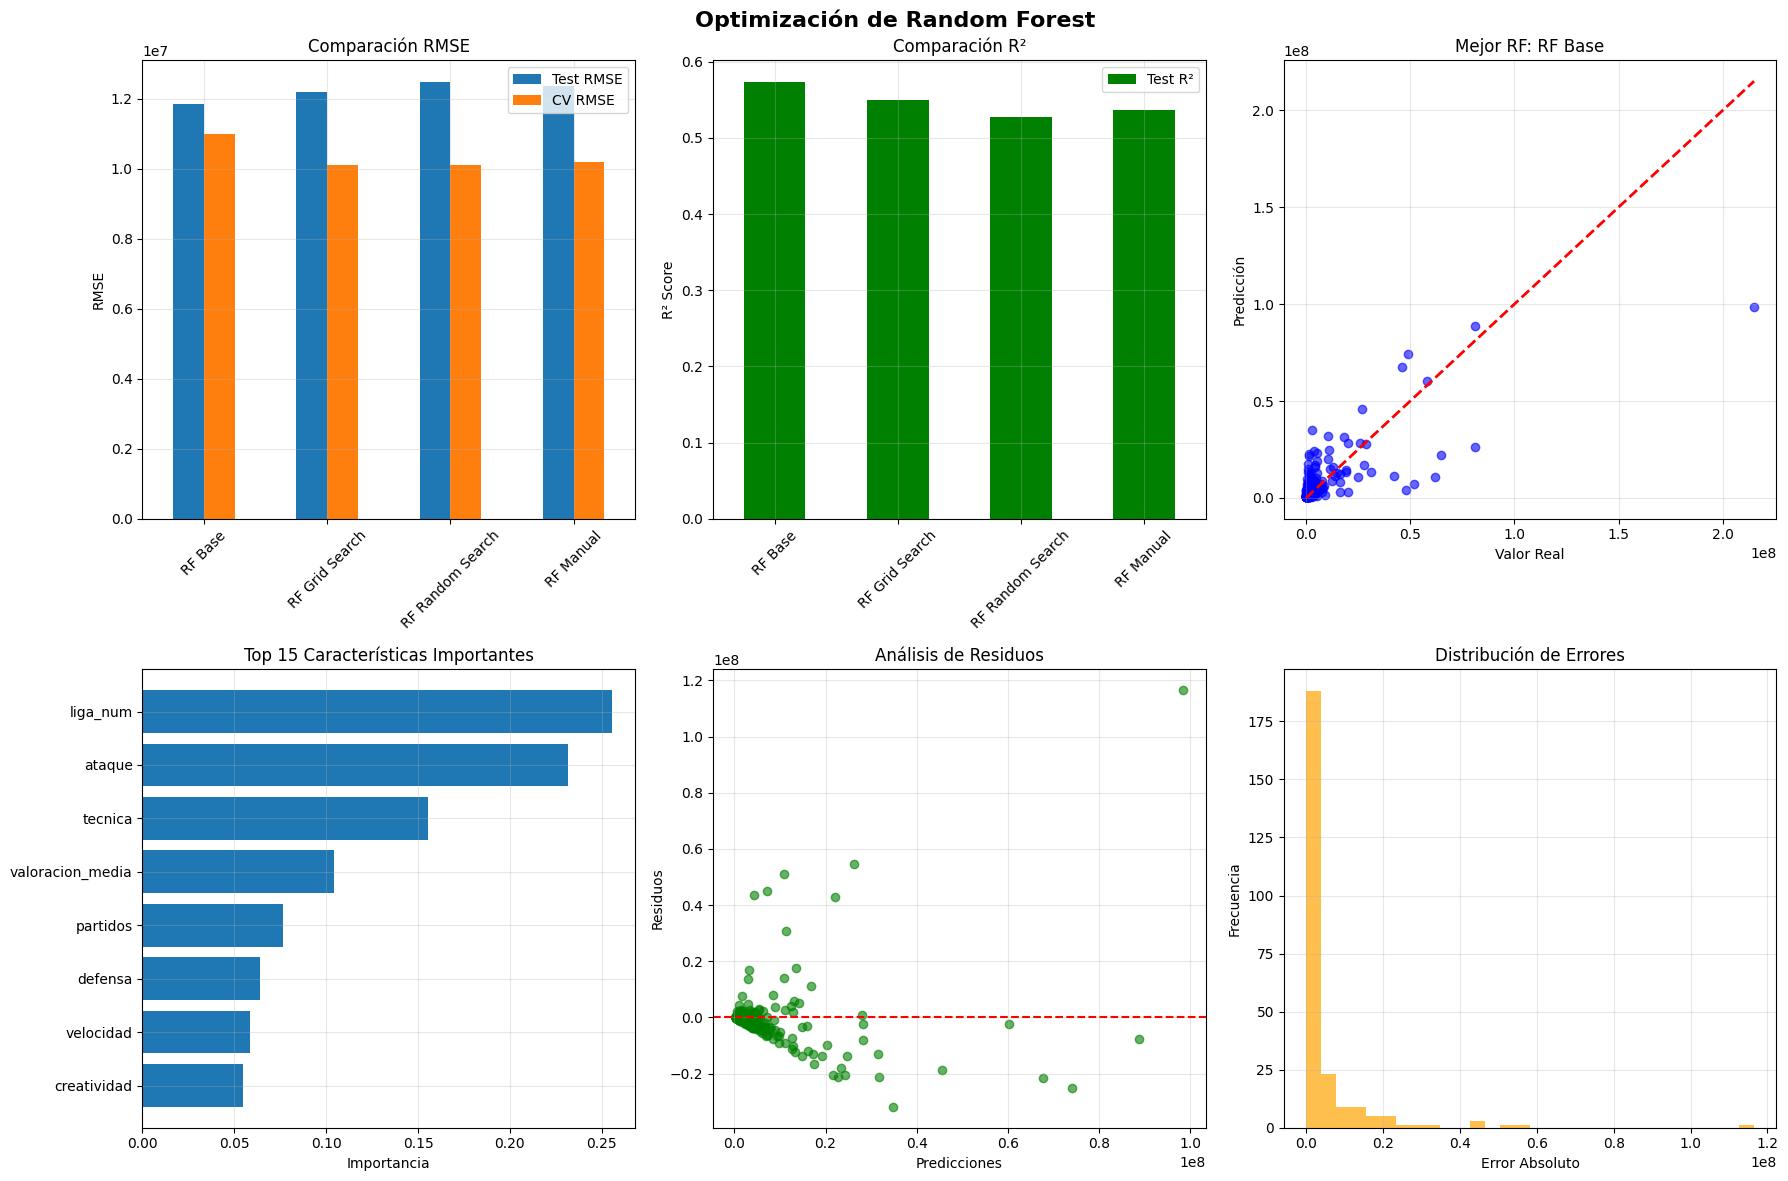


8. Análisis de curvas de aprendizaje...


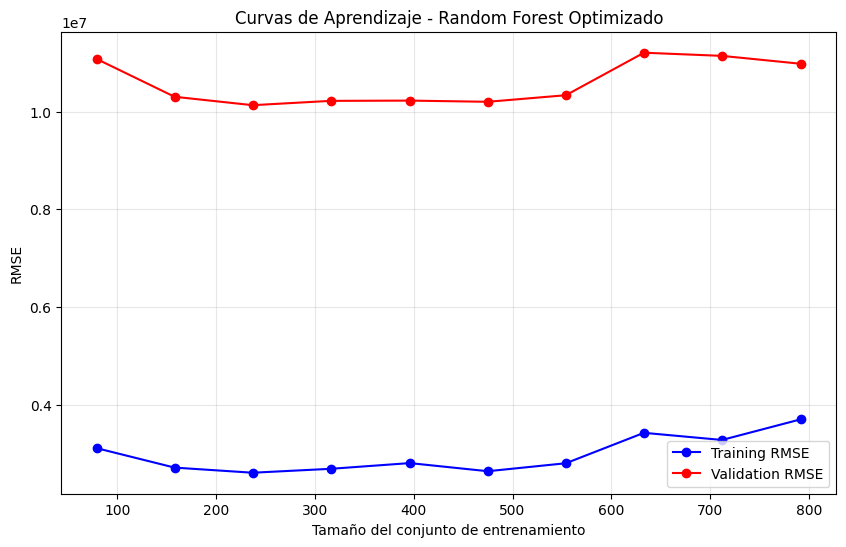


💡 RECOMENDACIONES:
   • Mejor configuración: RF Base
   • RMSE mejorado: 11,858,604 €
   • R² alcanzado: 0.573
   • Características más importantes: liga_num, ataque, tecnica

🔧 PARÁMETROS DEL MEJOR MODELO:
   • max_depth: None
   • max_features: 1.0
   • min_samples_leaf: 1
   • min_samples_split: 2
   • n_estimators: 100


In [24]:
# Optimización completa de Random Forest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

print("🔧 OPTIMIZACIÓN DE RANDOM FOREST")
print("="*50)

# 1. BÚSQUEDA DE HIPERPARÁMETROS CON GRID SEARCH
print("1. Grid Search - Búsqueda exhaustiva...")

# Definir parámetros a optimizar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Grid Search con validación cruzada
rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train_scaled, y_train)

print(f"✓ Mejores parámetros: {rf_grid.best_params_}")
print(f"✓ Mejor score CV: {-rf_grid.best_score_:,.2f}")

# 2. BÚSQUEDA ALEATORIA (MÁS RÁPIDA)
print("\n2. Random Search - Búsqueda aleatoria...")

# Parámetros más amplios para búsqueda aleatoria
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20, 25, 30, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', 0.3, 0.5, 0.7, None],
    'bootstrap': [True, False]
}

rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_dist,
    n_iter=50,  # 50 combinaciones aleatorias
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rf_random.fit(X_train_scaled, y_train)

print(f"✓ Mejores parámetros: {rf_random.best_params_}")
print(f"✓ Mejor score CV: {-rf_random.best_score_:,.2f}")

# 3. COMPARACIÓN DE MODELOS
print("\n3. Comparando modelos optimizados...")

models_rf = {
    'RF Base': RandomForestRegressor(random_state=42),
    'RF Grid Search': rf_grid.best_estimator_,
    'RF Random Search': rf_random.best_estimator_,
    'RF Manual': RandomForestRegressor(
        n_estimators=300,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )
}

results_rf = {}
predictions_rf = {}

for name, model in models_rf.items():
    # Entrenar modelo
    model.fit(X_train_scaled, y_train)
    
    # Predicciones
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)
    
    # Métricas
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    cv_rmse = np.sqrt(-cv_scores.mean())
    
    results_rf[name] = {
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Test MAE': test_mae,
        'CV RMSE': cv_rmse,
        'Overfitting': train_rmse * 1.5 < test_rmse
    }
    
    predictions_rf[name] = test_pred
    
    print(f"{name}: RMSE Test: {test_rmse:,.0f} | R² Test: {test_r2:.3f}")

# 4. TABLA COMPARATIVA
print("\n4. Tabla comparativa de resultados:")
df_results_rf = pd.DataFrame(results_rf).T.round(2)
print(df_results_rf[['Test RMSE', 'Test R²', 'Test MAE', 'CV RMSE']])

# 5. MEJOR MODELO
best_rf_name = df_results_rf['Test RMSE'].idxmin()
best_rf_model = models_rf[best_rf_name]

print(f"\n🏆 MEJOR RANDOM FOREST: {best_rf_name}")
print(f"   RMSE: {df_results_rf.loc[best_rf_name, 'Test RMSE']:,.0f} €")
print(f"   R²: {df_results_rf.loc[best_rf_name, 'Test R²']:.3f}")

# 6. ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS
print("\n6. Importancia de características del mejor modelo:")

feature_importance = best_rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importance)[::-1]

print("\nTop 10 características más importantes:")
for i in range(min(10, len(feature_names))):
    print(f"  {i+1:2d}. {feature_names[indices[i]]:20s}: {feature_importance[indices[i]]:.4f}")

# 7. VISUALIZACIONES
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Optimización de Random Forest', fontsize=16, fontweight='bold')

# Subplot 1: Comparación RMSE
ax1 = axes[0, 0]
rmse_data = df_results_rf[['Test RMSE', 'CV RMSE']]
rmse_data.plot(kind='bar', ax=ax1, rot=45)
ax1.set_title('Comparación RMSE')
ax1.set_ylabel('RMSE')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Subplot 2: Comparación R²
ax2 = axes[0, 1]
r2_data = df_results_rf[['Test R²']]
r2_data.plot(kind='bar', ax=ax2, rot=45, color='green')
ax2.set_title('Comparación R²')
ax2.set_ylabel('R² Score')
ax2.grid(True, alpha=0.3)

# Subplot 3: Predicciones del mejor modelo
ax3 = axes[0, 2]
best_pred_rf = predictions_rf[best_rf_name]
ax3.scatter(y_test, best_pred_rf, alpha=0.6, color='blue')
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax3.set_xlabel('Valor Real')
ax3.set_ylabel('Predicción')
ax3.set_title(f'Mejor RF: {best_rf_name}')
ax3.grid(True, alpha=0.3)

# Subplot 4: Importancia de características
ax4 = axes[1, 0]
n_features = len(feature_importance)

top_features = min(n_features, 10)
ax4.barh(range(top_features), feature_importance[indices[:top_features]][::-1])
ax4.set_yticks(range(top_features))
ax4.set_yticklabels([feature_names[indices[i]] for i in range(top_features)][::-1])
ax4.set_xlabel('Importancia')
ax4.set_title('Top 15 Características Importantes')
ax4.grid(True, alpha=0.3)

# Subplot 5: Residuos
ax5 = axes[1, 1]
residuals_rf = y_test - best_pred_rf
ax5.scatter(best_pred_rf, residuals_rf, alpha=0.6, color='green')
ax5.axhline(y=0, color='r', linestyle='--')
ax5.set_xlabel('Predicciones')
ax5.set_ylabel('Residuos')
ax5.set_title('Análisis de Residuos')
ax5.grid(True, alpha=0.3)

# Subplot 6: Distribución de errores
ax6 = axes[1, 2]
errors_rf = np.abs(residuals_rf)
ax6.hist(errors_rf, bins=30, alpha=0.7, color='orange')
ax6.set_xlabel('Error Absoluto')
ax6.set_ylabel('Frecuencia')
ax6.set_title('Distribución de Errores')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 8. ANÁLISIS ADICIONAL: CURVAS DE APRENDIZAJE
print("\n8. Análisis de curvas de aprendizaje...")

from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    best_rf_model, X_train_scaled, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

train_rmse_mean = np.sqrt(-train_scores.mean(axis=1))
train_rmse_std = np.sqrt(-train_scores.std(axis=1))
val_rmse_mean = np.sqrt(-val_scores.mean(axis=1))
val_rmse_std = np.sqrt(-val_scores.std(axis=1))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse_mean, 'o-', color='blue', label='Training RMSE')
plt.fill_between(train_sizes, train_rmse_mean - train_rmse_std,
                 train_rmse_mean + train_rmse_std, alpha=0.1, color='blue')

plt.plot(train_sizes, val_rmse_mean, 'o-', color='red', label='Validation RMSE')
plt.fill_between(train_sizes, val_rmse_mean - val_rmse_std,
                 val_rmse_mean + val_rmse_std, alpha=0.1, color='red')

plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('RMSE')
plt.title('Curvas de Aprendizaje - Random Forest Optimizado')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 9. RECOMENDACIONES FINALES
print("\n💡 RECOMENDACIONES:")
print(f"   • Mejor configuración: {best_rf_name}")
print(f"   • RMSE mejorado: {df_results_rf.loc[best_rf_name, 'Test RMSE']:,.0f} €")
print(f"   • R² alcanzado: {df_results_rf.loc[best_rf_name, 'Test R²']:.3f}")
print(f"   • Características más importantes: {feature_names[indices[0]]}, {feature_names[indices[1]]}, {feature_names[indices[2]]}")

# Mostrar parámetros del mejor modelo
print(f"\n🔧 PARÁMETROS DEL MEJOR MODELO:")
for param, value in best_rf_model.get_params().items():
    if param in ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features']:
        print(f"   • {param}: {value}")

In [25]:
#guardamos el modelo
import joblib
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')
# Guardamos el scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [28]:
#hacemos una prediccion
def predict_market_value(player_data):
    # Cargar el modelo y el scaler
    model = joblib.load('best_random_forest_model.pkl')
    scaler = joblib.load('scaler.pkl')
    
    # Preprocesar los datos del jugador
    player_data_scaled = scaler.transform([player_data])
    
    # Realizar la predicción
    predicted_value = model.predict(player_data_scaled)
    
    return predicted_value[0]
# Ejemplo de uso
example_player_data = X_test_scaled[0]  # Usar los datos del primer jugador
predicted_value = predict_market_value(example_player_data)
print(f"Valor de mercado predicho: {predicted_value:,.2f} €")

Valor de mercado predicho: 17,823,000.00 €
